# **AirBnB Seattle Data Analysis**

We have the property listings of airbnb accommodations in Seattle. This project provides us with three datasets: Property Listings, Calendar & Reviews of Properties. I will be posting few business questions and will solve those questions with help of visualizations and data analysis. We will perform few data cleaning steps before proceeding.


In [144]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import calendar
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import os
for dirname, _, filenames in os.walk('./Airbnb Datasets/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Airbnb Datasets/calendar.csv
./Airbnb Datasets/listings.csv
./Airbnb Datasets/reviews.csv


**Steps to proceed further:**
*  Clean dataset
*  Solve few questions with visualizations
*  Post the inferences wherever needed

Our analysis is to understand factors that influences pricings, doing deeper analysis to understand how holidays/days of week impact pricing. Below are few questions that will be discussed further:

* Q-1) Which category of property tends to have higher cost?
* Q-2) What is the occupancy rate in 2016 across months?
* Q-3) What factors is price dependent on?
* Q-4) Which time has the highest price?
* Q-5) How does price fluctuate from weekdays versus weekends?
* Q-6) Which holiday has the highest price rate?




**Gather Data**

* df_calendar : Contains availability and pricings of all listings
* df_listings : Contains property listing details including pricing and other attributes
* df_reviews : Contains property reviews and ratings provided by customers during ther stay

In [145]:
df_calendar = pd.read_csv('./Airbnb Datasets/calendar.csv')
df_listings = pd.read_csv('./Airbnb Datasets/listings.csv')
df_reviews = pd.read_csv('./Airbnb Datasets/reviews.csv')

In [146]:
len(df_calendar[df_calendar['price'].isna()==True])

459028

In [147]:
len(df_calendar)

1393570

In [148]:
len(df_calendar[df_calendar['price'].isna()==True])/len(df_calendar)

0.32938998399793334

**Data Understanding**

We will deep dive into all three datasets to see the datatypes, missing values and columns available. This will help us in decinding how to handle missing values and convert datetimes format as per need.

In [149]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [150]:
df_calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [151]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


**Data Cleaning**

In df_calendar, I have replaced all Nan with median values as the price ditribution is skewed and not symmetrical. We observed that the price columns have dollar prefixed to the values. We will replace that and make it numeric. 

We will also convert date column in df_Calendar to datetime format. Further to that, we will create a new column hich gives month and year of respective dates. We will then merge df_calendar and df_listings to do further analysis

In [152]:
#Clean the price column by removing $ and converting to float
df_calendar['price']=df_calendar['price'].replace( '[\$,)]','', regex=True ).astype(float).values
df_listings['price']=df_listings['price'].replace( '[\$,)]','', regex=True ).astype(float).values

In [153]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1393570 non-null  int64  
 1   date        1393570 non-null  object 
 2   available   1393570 non-null  object 
 3   price       934542 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 42.5+ MB


Let's study the distribution of price data. This study will help us in determining which approach to take for filling missing values.

C:\Users\meetp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price distribution Plot')

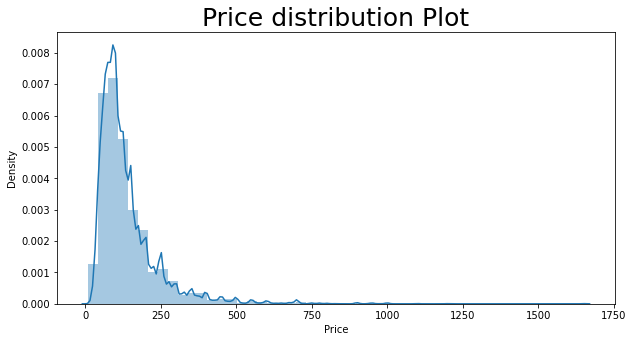

In [154]:
plt.figure(figsize=(10,5))
x=pd.Series(df_calendar['price'], name = 'Price')
sns.distplot(x,kde=True,label='Seattle')
plt.title('Price distribution Plot',fontsize=25)

We can clearly see that the graph is skewed. And whenever the graph is skewed its better to replace NaNs with median. Mean is mostly used when its a symmetrical distribution. Mode can also be used with skewed data.

In [155]:
#Convert date column to datetime
df_calendar['date']= pd.to_datetime(df_calendar['date'])

In [156]:
#Calculate year-month columns from date column
df_calendar['date_year_month'] = df_calendar['date'].dt.strftime('%Y-%m')

In [157]:
#Merge Listings and Calendar files 
df_list_cal = pd.merge(df_calendar, df_listings, left_on = 'listing_id', right_on = 'id')

In [158]:
df_list_cal.columns

Index(['listing_id', 'date', 'available', 'price_x', 'date_year_month', 'id',
       'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommoda

In [159]:
df_list_cal.rename({'price_x':'price'}, axis=1, inplace=True)

In [160]:
(np.isnan(df_list_cal['price']).sum()/len(df_list_cal))

0.32938998399793334

In [161]:
df_list_cal['price'].fillna(df_list_cal['price'].mean(),inplace=True)

**Analyze and Visualize**

We all know visualizations is one of the most important leg of Data Science. For this case study, we will take up all the questions one by one and solve them using visualizations (box-plots, line charts, bar graphs etc)

C:\Users\meetp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price distribution Plot')

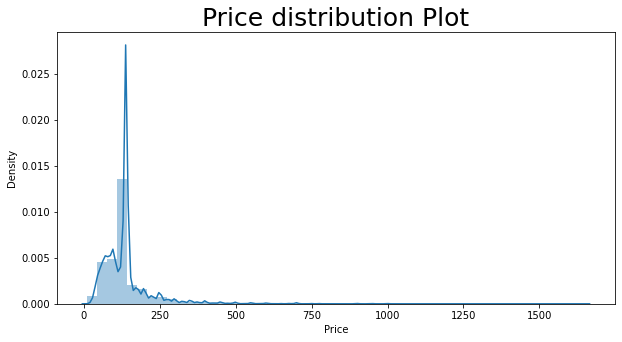

In [162]:
plt.figure(figsize=(10,5))
x=pd.Series(df_list_cal['price'], name = 'Price')
sns.distplot(x,kde=True,label='Seattle')
plt.title('Price distribution Plot',fontsize=25)

We can see that most of the properties have an average price of 50-125 dollars

***Q-1) Which category of property tends to have higher cost?***

Let's use boxplot to do this analysis. Box plot graphically depicts numerical data groups through their quartiles. We can check the medians and min,max price value across property types.

C:\Users\meetp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price')

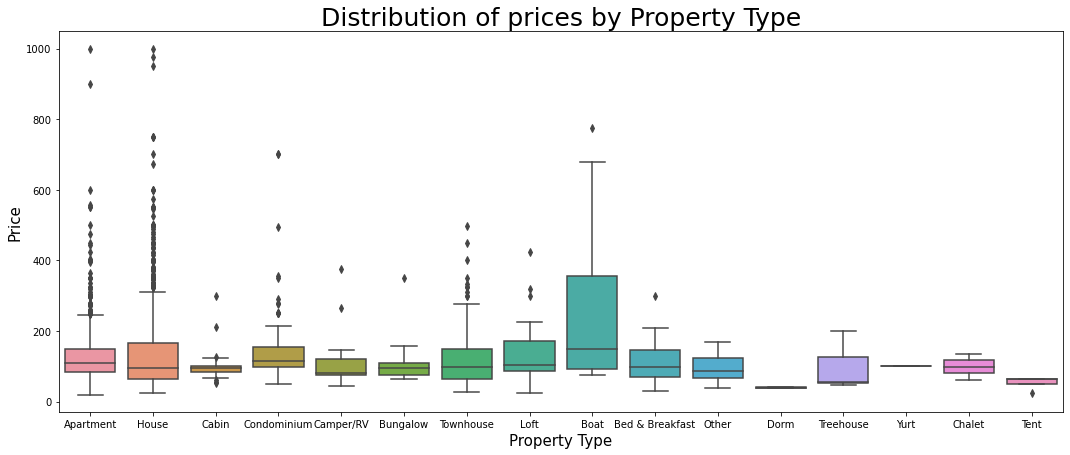

In [163]:
fig1,ax1 = plt.subplots(figsize=(18, 7))
x=df_listings['property_type']
y=df_listings['price']
boxplot=sns.boxplot(x,y)
boxplot.axes.set_title('Distribution of prices by Property Type',fontsize=25)
boxplot.axes.set_xlabel('Property Type',fontsize=15)
boxplot.axes.set_ylabel('Price',fontsize=15)

***Boat Properties seem to have highest price median and Dorms have the lowest. Boat also seems to have highest price during peak seasons***

Apartment, Bed & Breakfast seems to have optimal mean price of approx 115 and 100 dollars respectively. Dorm and Tent seems to have lowest mean prices.

**Q-2) What is the occupancy rate in 2016 across months?**

In [164]:
def rename_value(x):
    '''Rename_Value function is created to rename t/f to 
    Available/Unavailable respectively for better readability. '''
    if (x=='t'):
        return('Available')
    else:
        return('Unavailable')
df_calendar['Availablity Status']=df_calendar['available'].apply(lambda x:rename_value(x))

Text(0, 0.5, 'Year Month ')

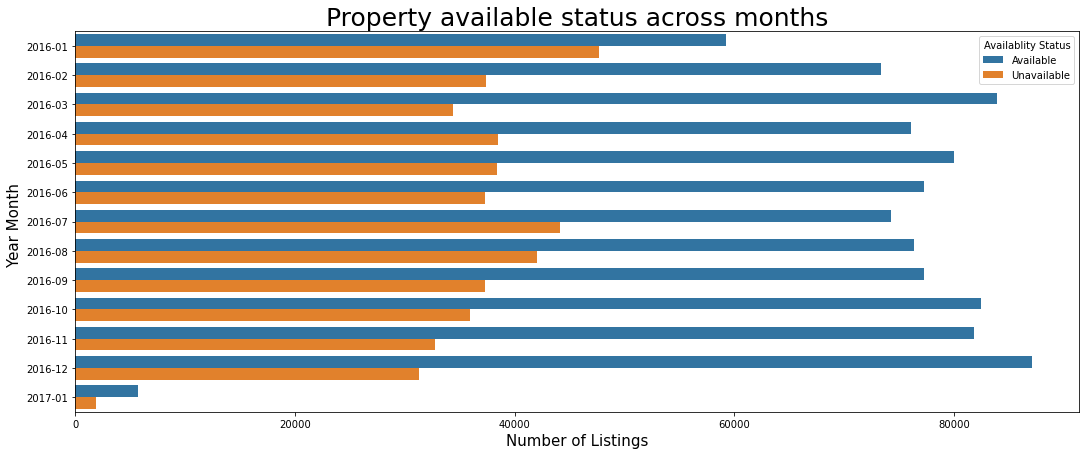

In [165]:
#Create a countplot across month-year column 
fig1,ax1 = plt.subplots(figsize=(18, 7))
x=df_calendar
y=df_calendar['date_year_month']
countplot=sns.countplot(data=x,y=y, hue='Availablity Status')
countplot.axes.set_title('Property available status across months',fontsize=25)
countplot.axes.set_xlabel('Number of Listings',fontsize=15)
countplot.axes.set_ylabel('Year Month ',fontsize=15)

***The above graph shows high occupancy rate in the following months: March,October,November & December***

**Q-3) What factors is price dependent on?**

Lets read through correlation matrix to understand the relation between price and other variables. Higher the correlation factor, more the dependency.

Text(0.5, 1.0, 'Correlation Matrix')

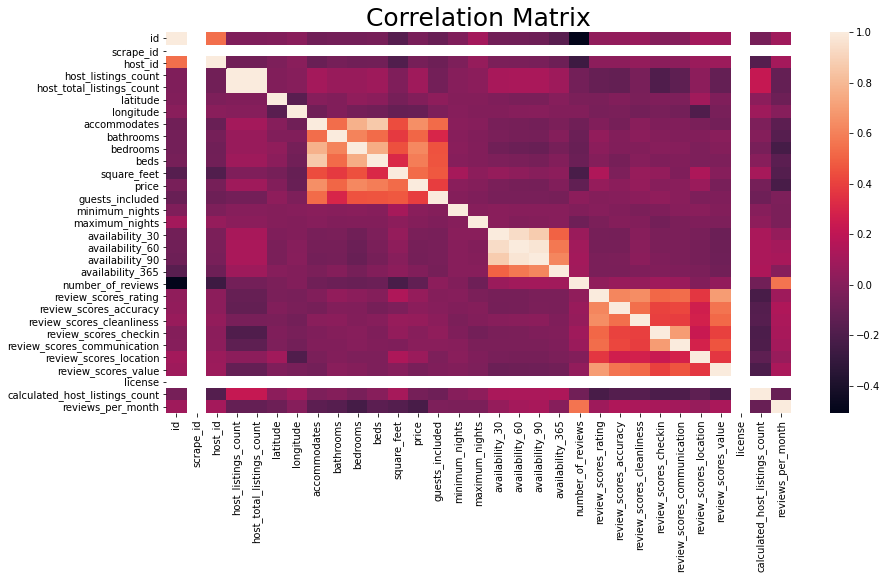

In [166]:
fig1,ax1 = plt.subplots(figsize=(14, 7))
sns.heatmap(df_listings.corr())
plt.title('Correlation Matrix',fontsize=25)

In [167]:
df_listings.corr()['price']

id                               -0.046289
scrape_id                              NaN
host_id                          -0.051332
host_listings_count               0.093962
host_total_listings_count         0.093962
latitude                         -0.008904
longitude                        -0.102420
accommodates                      0.652218
bathrooms                         0.516424
bedrooms                          0.627720
beds                              0.589525
square_feet                       0.531752
price                             1.000000
guests_included                   0.392875
minimum_nights                    0.017297
maximum_nights                   -0.003336
availability_30                  -0.037653
availability_60                  -0.049336
availability_90                  -0.058810
availability_365                 -0.015550
number_of_reviews                -0.124695
review_scores_rating              0.055551
review_scores_accuracy            0.019026
review_scor

Text(0, 0.5, 'Features')

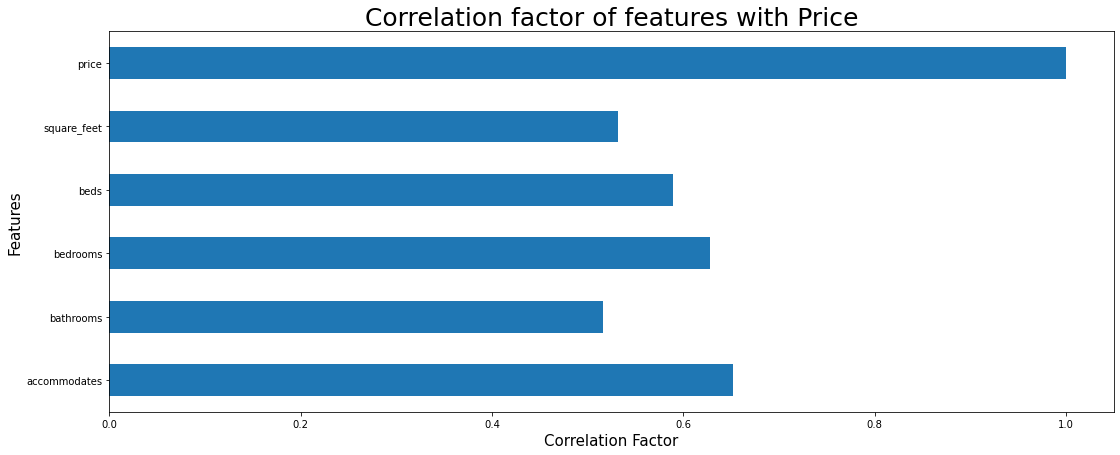

In [168]:
#As we can see not many factors are negatively correlated with price, hence we will just take positive correlation factor to analyze which is impacting price
fig1,ax1 = plt.subplots(figsize=(18, 7))
df_corr=df_listings.corr()['price'][(abs(df_listings.corr()['price'])>0.5 )==True]
df_corr.plot(kind='barh')
plt.title('Correlation factor of features with Price',fontsize=25)
plt.xlabel('Correlation Factor',fontsize=15)
plt.ylabel('Features',fontsize=15)

**Price is directly correlated to bedrooms, bathrooms, accomodates and beds. Hence the price is higher for listings which have more bedrooms,bathrooms, beds etc.**

**Q-4) Which time has the highest price?**

To get which month/time has highest price, let just plot the mean price of every month.

Text(0, 0.5, 'Average Price')

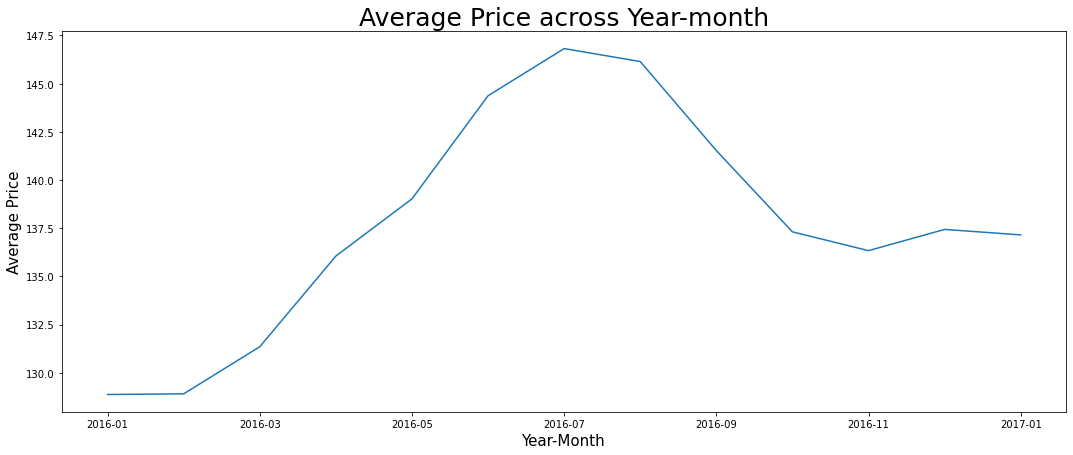

In [169]:
fig1,ax1 = plt.subplots(figsize=(18, 7))
df_list_cal.groupby(['date_year_month'])['price'].mean().plot()
plt.title('Average Price across Year-month',fontsize=25)
plt.xlabel('Year-Month',fontsize=15)
plt.ylabel('Average Price',fontsize=15)

In [170]:
df_list_cal.groupby(['date_year_month'])['price'].mean()

date_year_month
2016-01    128.870133
2016-02    128.905102
2016-03    131.349153
2016-04    136.054321
2016-05    139.021420
2016-06    144.370582
2016-07    146.817843
2016-08    146.144582
2016-09    141.526668
2016-10    137.308997
2016-11    136.334019
2016-12    137.435089
2017-01    137.152192
Name: price, dtype: float64

***Price is highest on July,2016 and lowest in Januray,2016 .***

**Q-5) How does price fluctuate from weekdays versus weekends?**

First of all, create a new column which gives the day of the respective date. Then we can graphically see which day has higher price mean values. We can also define weekends and weekdays to study price distribution of weekend versus weekdays

In [171]:
#Create a new column day based on the date
df_list_cal['day'] = df_list_cal['date'].apply(lambda x : calendar.day_name[x.weekday()])
df_list_cal.head()

,listing_id,date,available,price,date_year_month,id,listing_url,scrape_id,last_scraped,name,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,day
0,241032,2016-01-04,t,85.000000,2016-01,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,Monday
1,241032,2016-01-05,t,85.000000,2016-01,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,Tuesday
2,241032,2016-01-06,f,137.944859,2016-01,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,Wednesday
3,241032,2016-01-07,f,137.944859,2016-01,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,Thursday
4,241032,2016-01-08,f,137.944859,2016-01,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,Friday


Text(0, 0.5, 'Average Price')

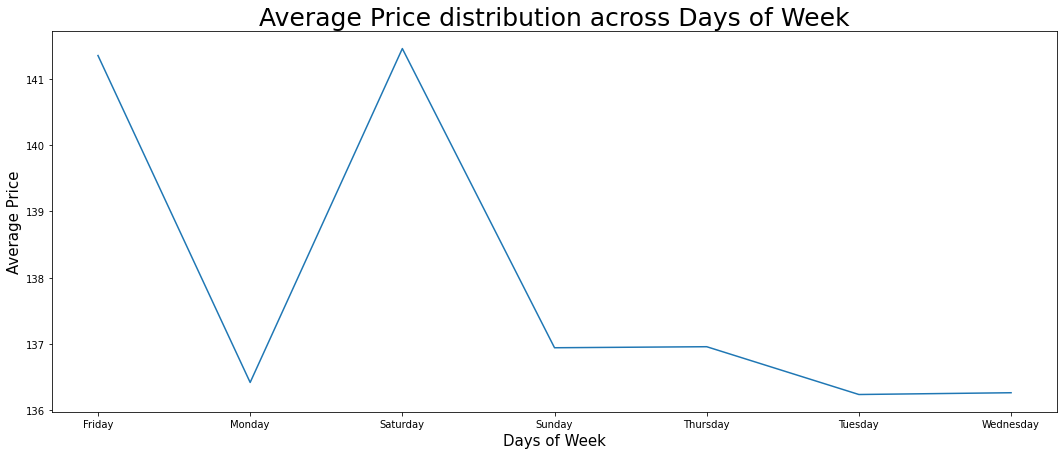

In [172]:
#Plot graph of avg price across day column
fig1,ax1 = plt.subplots(figsize=(18, 7))
df_list_cal.groupby(['day'])['price'].mean().plot()
plt.title('Average Price distribution across Days of Week',fontsize=25)
plt.xlabel('Days of Week',fontsize=15)
plt.ylabel('Average Price',fontsize=15)

In [173]:
#Including only 2016 data and not 2017
df_list_cal2= df_list_cal[df_list_cal['date']<'2017-01-01']
df_list_cal2['day'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [174]:
#Calculate avg prices across day
df2= df_list_cal2.groupby(['day'])['price'].mean()
df3= pd.DataFrame(df2)
df3

,price
day,
Friday,141.350578
Monday,136.426394
Saturday,141.455448
Sunday,136.923179
Thursday,136.961123
Tuesday,136.240721
Wednesday,136.267407


***Fridays and Saturdays see the highest price****

In [175]:
#Define these three days as weekends
df3['Weekend']= df3.index.isin(['Friday','Saturday','Sunday'])

Text(0, 0.5, 'Average Price')

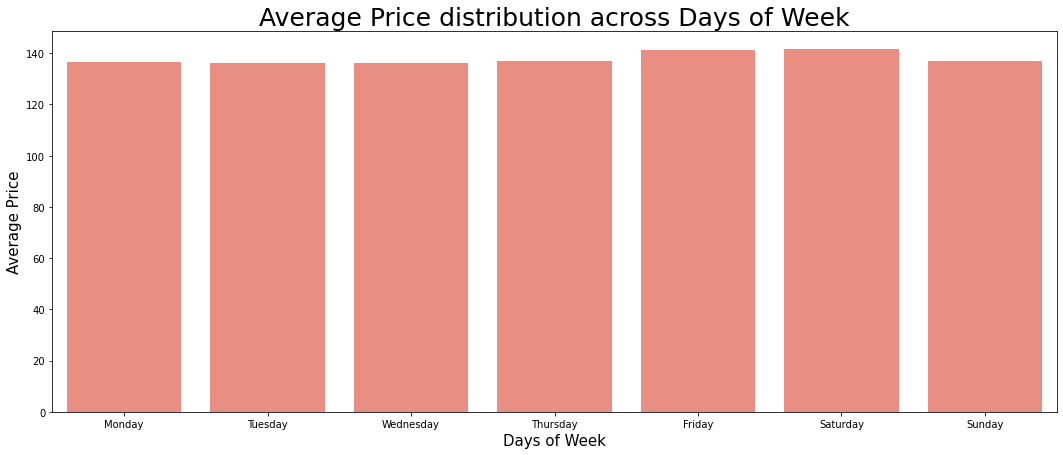

In [176]:
#Plot barplot to visualise weekdays against weekends
fig1,ax1 = plt.subplots(figsize=(18, 7))
sns.barplot(data=df3, x = df3.index, y=df3.price, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],color='Salmon')
plt.title('Average Price distribution across Days of Week',fontsize=25)
plt.xlabel('Days of Week',fontsize=15)
plt.ylabel('Average Price',fontsize=15)

***Its clearly visible Friday, Saturday has higher avg price***

**Q-6) Which holiday has the highest price rate?**

Lets import US holiday calendar using USFederalHolidayCalendar library.Then check the price mean of holidays

In [177]:
#Import US Federal Holiday Calendar
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [178]:
cal = calendar()
dr = pd.date_range(start='2016-01-01', end='2016-12-31')
holidays = cal.holidays(start=dr.min(), end=dr.max())

df_list_cal2['Holiday'] = df_list_cal2['date'].isin(holidays)
df_list_cal2[df_list_cal2['Holiday']==True]

<ipython-input-178-0f1bf9f10b79>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list_cal2['Holiday'] = df_list_cal2['date'].isin(holidays)


,listing_id,date,available,price,date_year_month,id,listing_url,scrape_id,last_scraped,name,...,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,day,Holiday
14,241032,2016-01-18,t,85.000000,2016-01,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,...,NaN,WASHINGTON,f,moderate,f,f,2,4.07,Monday,True
42,241032,2016-02-15,t,85.000000,2016-02,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,...,NaN,WASHINGTON,f,moderate,f,f,2,4.07,Monday,True
147,241032,2016-05-30,t,85.000000,2016-05,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,...,NaN,WASHINGTON,f,moderate,f,f,2,4.07,Monday,True
182,241032,2016-07-04,t,85.000000,2016-07,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,...,NaN,WASHINGTON,f,moderate,f,f,2,4.07,Monday,True
245,241032,2016-09-05,t,85.000000,2016-09,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,...,NaN,WASHINGTON,f,moderate,f,f,2,4.07,Monday,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393450,10208623,2016-09-05,f,137.944859,2016-09,10208623,https://www.airbnb.com/rooms/10208623,20160104002432,2016-01-04,Large Lakefront Apartment,...,NaN,WASHINGTON,f,flexible,f,f,1,NaN,Monday,True
1393485,10208623,2016-10-10,f,137.944859,2016-10,10208623,https://www.airbnb.com/rooms/10208623,20160104002432,2016-01-04,Large Lakefront Apartment,...,NaN,WASHINGTON,f,flexible,f,f,1,NaN,Monday,True
1393517,10208623,2016-11-11,f,137.944859,2016-11,10208623,https://www.airbnb.com/rooms/10208623,20160104002432,2016-01-04,Large Lakefront Apartment,...,NaN,WASHINGTON,f,flexible,f,f,1,NaN,Friday,True
1393530,10208623,2016-11-24,f,137.944859,2016-11,10208623,https://www.airbnb.com/rooms/10208623,20160104002432,2016-01-04,Large Lakefront Apartment,...,NaN,WASHINGTON,f,flexible,f,f,1,NaN,Thursday,True


Text(0, 0.5, 'Average Price')

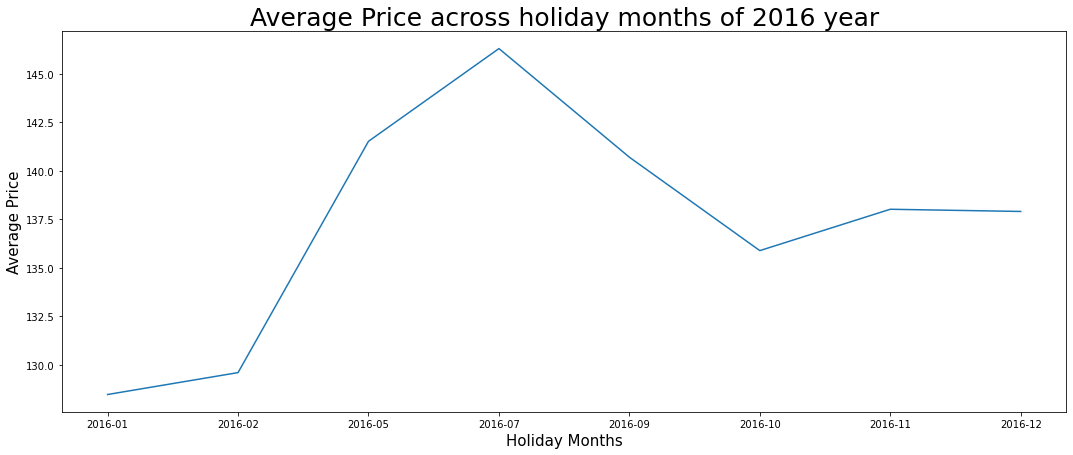

In [179]:
#Plot graph only for holidays
fig1,ax1 = plt.subplots(figsize=(18, 7))
df3=df_list_cal2[df_list_cal2['Holiday']==True]
df3.groupby(['date_year_month']).price.mean().plot()
plt.title('Average Price across holiday months of 2016 year',fontsize=25)
plt.xlabel('Holiday Months',fontsize=15)
plt.ylabel('Average Price',fontsize=15)

In [180]:
df3.groupby(['date_year_month']).price.mean()


date_year_month
2016-01    128.476032
2016-02    129.604747
2016-05    141.523023
2016-07    146.302046
2016-09    140.705016
2016-10    135.890936
2016-11    138.021770
2016-12    137.908480
Name: price, dtype: float64

***July holiday has the highest price, owing to Independence day which is on 4th July***

**Conclusion**

Based on our analysis so far we conclude that July month sees the highest price while Jan has the lowest dip. After doing a deep dive into it, we understand 4th July has the highest pricing compared to all the other holidays, owing to Independence Day. 

Boat is one of the most expensive properties offerings. Weekends also sees higher prices compared to weekdays and more the number of beds,bedrooms,bathrooms, higher the price goes.

Now when you plan the next trip, you can take above factors into consideration to get the best bet.